# LSTM

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Input
from sklearn.model_selection import train_test_split
num_features = 150 * 150 * 3
# Function to load images from a folder and assign labels
def load_data_from_folder(folder, label, sequence_length):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if os.path.isfile(img_path):
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (150, 150))  # Resize to consistent size
                images.append(img)
                labels.append(label)

    # Convert images and labels to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Calculate the number of sequences
    num_sequences = len(images) // sequence_length

    # Reshape images to create sequences
    images = images[:num_sequences * sequence_length].reshape(-1, sequence_length, images.shape[1], images.shape[2], images.shape[3])

    return images, labels

sequence_length = 5
squat_images, squat_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/squat/', 0, sequence_length)
plank_images, plank_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/plank', 1, sequence_length)
lunge_images, lunge_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/lunge', 2, sequence_length)
crunch_images, crunch_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/crunch/', 3, sequence_length)
up_images, up_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/up', 4, sequence_length)
raise_images, raise_labels = load_data_from_folder('/Users/junheehan/Library/CloudStorage/OneDrive-Personal/Jun/핀테크/기계학습과딥러닝_이재욱/deep_learning_motion_detection/raise', 5, sequence_length)





# Convert the lists of images and labels to numpy arrays
squat_images = np.array(squat_images)
plank_images = np.array(plank_images)
lunge_images = np.array(lunge_images)
crunch_images = np.array(crunch_images)
up_images = np.array(up_images)
raise_images = np.array(raise_images)


squat_images = squat_images.reshape(-1, sequence_length, num_features)
plank_images = plank_images.reshape(-1, sequence_length, num_features)
lunge_images = lunge_images.reshape(-1, sequence_length, num_features)
crunch_images = crunch_images.reshape(-1, sequence_length, num_features)
up_images = up_images.reshape(-1, sequence_length, num_features)
raise_images = raise_images.reshape(-1, sequence_length, num_features)




squat_labels = np.array([0] * squat_images.shape[0])
plank_labels = np.array([1] * plank_images.shape[0])
lunge_labels = np.array([2] * lunge_images.shape[0])
crunch_labels = np.array([3] * crunch_images.shape[0])
up_labels = np.array([4] * up_images.shape[0])
raise_labels = np.array([5] * raise_images.shape[0])



# Check if images and labels are loaded correctly
print("Number of squat images:", len(squat_images))
print("Number of plank images:", len(plank_images))
print("Number of lunge images:", len(lunge_images))
print("Number of crunch images:", len(crunch_images))
print("Number of up images:", len(up_images))
print("Number of raise images:", len(raise_images))




Epoch 1/10
24/24 [==============================] - 13s 428ms/step - loss: 1.3173 - accuracy: 0.5424 - val_loss: 0.8628 - val_accuracy: 0.7344
Epoch 2/10
24/24 [==============================] - 7s 282ms/step - loss: 0.7523 - accuracy: 0.7027 - val_loss: 0.5101 - val_accuracy: 0.6979
Epoch 3/10
24/24 [==============================] - 7s 265ms/step - loss: 0.5324 - accuracy: 0.7536 - val_loss: 0.3481 - val_accuracy: 0.8594
Epoch 4/10
24/24 [==============================] - 7s 288ms/step - loss: 0.3876 - accuracy: 0.8435 - val_loss: 0.2325 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 7s 278ms/step - loss: 0.3210 - accuracy: 0.8774 - val_loss: 0.1411 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 6s 256ms/step - loss: 0.1375 - accuracy: 0.9778 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 8s 332ms/step - loss: 0.0695 - accuracy: 0.9974 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch

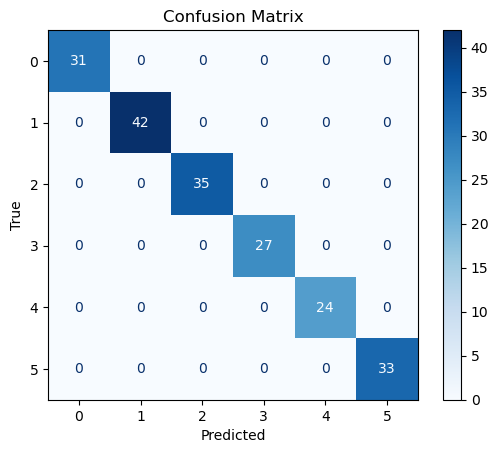

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Combine all the images and labels
X = np.concatenate((squat_images, plank_images, lunge_images, crunch_images, up_images, raise_images), axis=0)
y = np.concatenate((squat_labels, plank_labels, lunge_labels, crunch_labels, up_labels, raise_labels), axis=0)

# Normalize the data
X = X / 255.0

# Encode class labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Convert class labels to one-hot encoded vectors
y_one_hot = to_categorical(y_encoded, num_classes=num_classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(128, input_shape=(sequence_length, num_features), return_sequences=True))
model.add(LSTM(64, return_sequences=False))

# Add a dense layer for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Change the output layer for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Now, you can evaluate the model and create a confusion matrix if needed
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, values_format='d')

# Add titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Show the confusion matrix plot
plt.show()
